In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
last12 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all() 

In [12]:
df = pd.DataFrame(last12, columns=['date', 'precipitation'])
df.set_index('date', inplace=True, )
df.head(10)


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


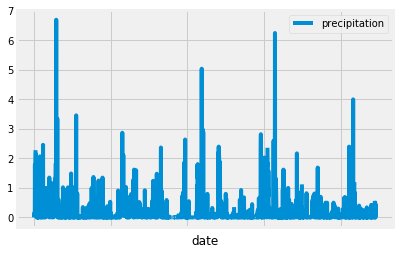

In [13]:
df.plot()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation
df.precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationActivity=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

In [17]:
stationActivity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
   

[(54.0, 85.0, 71.66378066378067)]

In [19]:
stationActivity[0][0]

'USC00519281'

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obs281= session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()

df2 =pd.DataFrame(obs281)

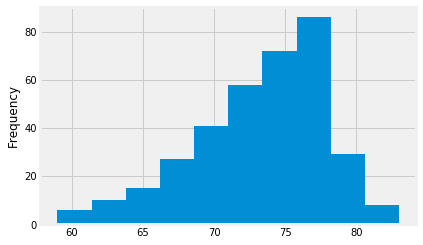

In [21]:
df2['tobs'].plot(kind='hist')
plt.show()


In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calcTemps(start_date, end_date):    
    
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()       

print(calcTemps('2017-03-28', '2017-04-09'))

[(67.0, 80.0, 74.59036144578313)]


In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
vacaTemp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= '2017-03-28').filter(Measurement.date <= '2017-04-09').all()  

df5=pd.DataFrame(vacaTemp, columns = ['min', 'max','avg'])


In [26]:
plt.bar(len(df5.avg),df5.avg,yerr='df5.max'-'df5.min',align='center') #
plt.ylabel('Avg Temp')
plt.title('Trip Avg Temp')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [27]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

vacaRain=session.query(Measurement.station,func.sum(Measurement.prcp)).group_by(Measurement.station).\
filter(Measurement.date >='2017-03-28', Measurement.date <= '2017-04-09').\
order_by(func.sum(Measurement.prcp).desc()).all()

In [28]:
df3=pd.DataFrame(vacaRain, columns=['Station','Rainfall'])
df3

,Station,Rainfall
0,USC00516128,1.65
1,USC00519281,0.78
2,USC00513117,0.27
3,USC00514830,0.22
4,USC00519523,0.08
5,USC00517948,0.00
6,USC00519397,0.00


In [29]:
hiStations =session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all()

In [30]:
df4 =pd.DataFrame(hiStations,columns=['Station', 'Station Name', 'Latitude', 'Longitude','Elevation'])

In [31]:
pd.merge(df3,df4, on= 'Station')

,Station,Rainfall,Station Name,Latitude,Longitude,Elevation
0,USC00516128,1.65,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,0.78,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,0.27,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,0.22,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00519523,0.08,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
5,USC00517948,0.00,"PEARL CITY, HI US",21.39340,-157.97510,11.9
6,USC00519397,0.00,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [47]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index



In [49]:
# Plot the daily normals as an area plot with `stacked=Fals